In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def integra1(y, x, h):
    mz = 1.0064102564102563e-13
    return (4*np.pi/1000) * mz/(4*np.pi)*(3*x*h)/(x**2 + y**2 + h**2)**(5/2)

def master1(h, x0):
    l = 100e-6
    w = 2e-6
    return integrate.dblquad(integra1, -w/2 - x0, w/2 - x0, -l/2 , l/2, args=(h,), epsabs=1.49e-08, epsrel=1.49e-08)[0]/w*l

def master2(h, x0):
    l = 100
    w = 2
    return integrate.dblquad(integra1, -w/2 - 2*x0, w/2 - 2*x0, lambda x: -l/2 , lambda x: l/2, args=(h,), epsabs=1.49e-08, epsrel=1.49e-08)[0]/w*l


In [3]:
x0s = np.linspace(-20e-6,20e-6,1000)
hs = np.linspace(1e-6,2e-6,3)
areas = [[master1(h,x0)*0.47*500e-6 for x0 in x0s] for h in hs]
# areas2 = [[master2(h,x0) for x0 in x0s] for h in hs]

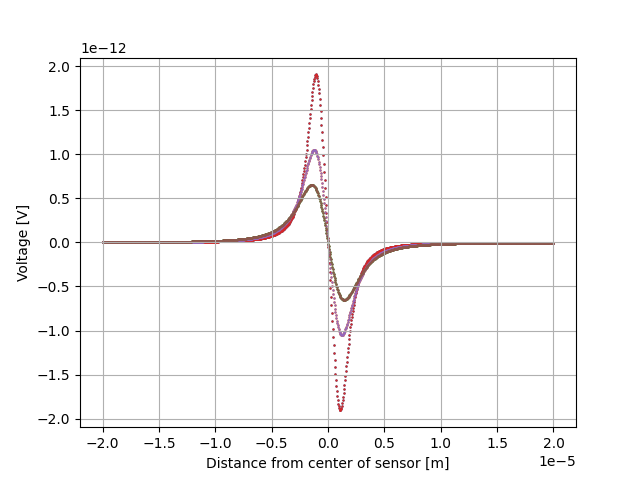

In [5]:
%matplotlib widget
for i in areas:
    plt.scatter(x=x0s,y=i, s=0.5)
    plt.ylabel('Voltage [V]')
    plt.xlabel('Distance from center of sensor [m]')
    plt.grid(True)
# for i in areas2:
#     plt.scatter(x=x0s,y=i, s=0.5)
plt.show()

In [ ]:
################################################################
################################################################
################################################################

In [6]:
def integra2(y, x, h, theta):
    ms = 4.0e-9
    w = 2.
    l = 100.
    return ms/1000*((3*x*h*np.cos(theta) + 3*np.sin(theta)*x**2)/(x**2 + y**2 + h**2)**(5/2) - (np.sin(theta)/(x**2 + y**2 + h**2)**(3/2)))

def master2(h, x0 ,theta):
    l = 100.
    w = 2.
    return integrate.dblquad(integra2, -w/2 - x0, w/2 - x0, lambda x: -l/2 , lambda x: l/2, args=(h,theta), epsabs=1.49e-08, epsrel=1.49e-08)[0]/w*l

In [7]:
x0s = np.linspace(-40,40,200)
thetas = np.linspace(np.radians(-20), np.radians(20), 3)
areas = [[master2(2.,x0, theta) for x0 in x0s] for theta in thetas]

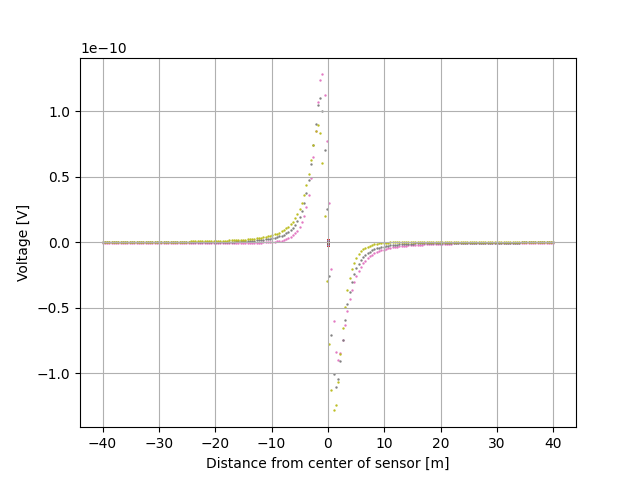

In [8]:
%matplotlib widget
for i in areas:
    plt.scatter(x=x0s,y=i, s=0.5)
plt.show()

In [9]:
np.random.seed()
t = np.array(x0s)
p = np.array(areas[0])
percentage = 0.5
n = np.random.normal(0, p.std(), t.size) * percentage 
#n = n * np.sin(t)
pn = p + n

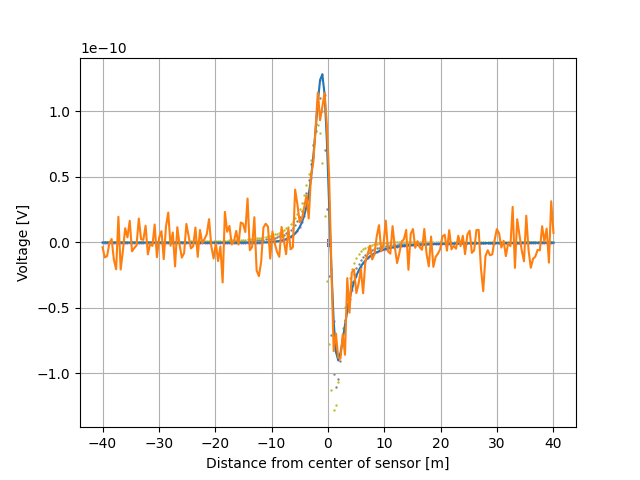

In [10]:
%matplotlib widget
plt.plot(t, p, label='pure signal')
plt.plot(t, pn, label='signal+noise')
plt.show()
#ax2 = fig.add_subplot(212)
#ax2.plot(t, pn - p, label='added noise', c='r')
#plt.legend()

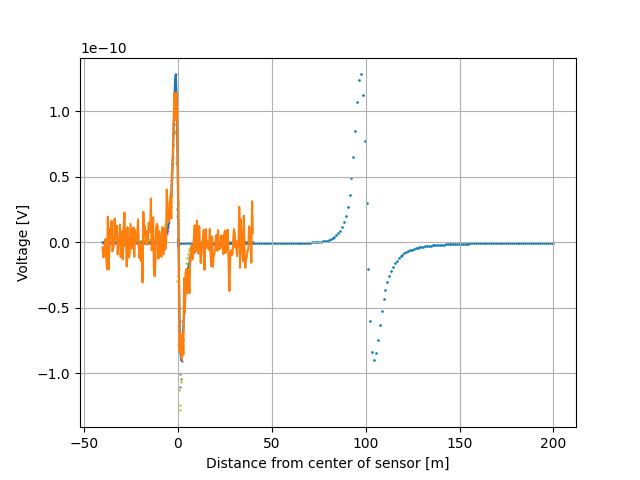

In [12]:
%matplotlib widget
xx = np.linspace(0,200,200)
plt.scatter(x=xx, y=areas[0], marker='o', s=0.5)
plt.show()

In [13]:
1e-9*0.47*500e-6

2.35e-13